**Задание 1**
Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()

In [6]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42 )

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

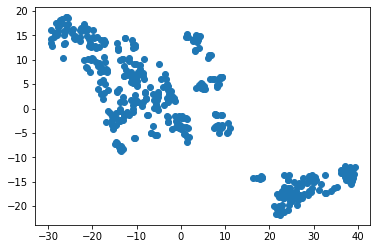

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах

In [14]:
from sklearn.cluster import KMeans

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

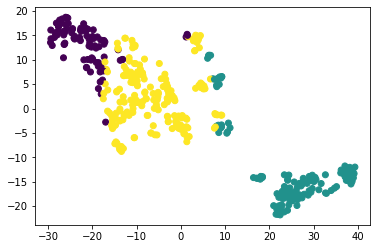

In [16]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [21]:
print('Первый кластер: ', y_train[labels_train == 0].mean())
print('Второй кластер:', y_train[labels_train == 1].mean())
print('Третий кластер:', y_train[labels_train == 2].mean())

Первый кластер:  27.78837209302326
Второй кластер: 16.165354330708663
Третий кластер: 24.958115183246072


In [22]:
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

Первый кластер:  0.07356558139534886
Второй кластер: 10.797028425196853
Третий кластер: 0.42166020942408367


**Задание 3**
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [23]:
labels_test = model.predict(X_test_scaled)

In [24]:
print('Первый кластер: ', y_test[labels_test == 0].mean())
print('Второй кластер:', y_test[labels_test == 1].mean())
print('Третий кластер:', y_test[labels_test == 2].mean())

Первый кластер:  31.35
Второй кластер: 16.43714285714286
Третий кластер: 21.860784313725492


In [25]:
print('Первый кластер: ', X_test['CRIM'][labels_test == 0].mean())
print('Второй кластер:', X_test['CRIM'][labels_test == 1].mean())
print('Третий кластер:', X_test['CRIM'][labels_test == 2].mean())

Первый кластер:  0.062060000000000004
Второй кластер: 10.165531142857143
Третий кластер: 0.26607882352941176
